In [2]:
import pandas as pd

levels = pd.read_csv("../data/levels.csv")
sessions = pd.read_csv("../data/player_session.csv")

In [3]:
# Tamamlanma oranı hesaplama
completion_stats = sessions.groupby("level_id").agg(
    total_plays=("player_id", "count"),
    completions=("completed", "sum"),
    avg_completion_time=("completion_time_sec", "mean")
).reset_index()

In [4]:
completion_stats["completion_rate"] = completion_stats["completions"] / completion_stats["total_plays"]

In [5]:
merged = pd.merge(levels, completion_stats, on="level_id")
merged.head()

,level_id,target_word,difficulty,letter_count,estimated_duration_sec,difficulty_score,total_plays,completions,avg_completion_time,completion_rate
0,0,CAT,Easy,3,39,0.26,33,33,54.909091,1.000000
1,1,SUN,Easy,3,40,0.30,38,31,57.677419,0.815789
2,2,MOON,Easy,4,28,0.10,31,28,55.678571,0.903226
3,3,DOG,Easy,3,40,0.16,38,32,60.031250,0.842105
4,4,TREE,Easy,4,33,0.27,27,26,53.230769,0.962963


### Difficulty Score vs. Completion Rate

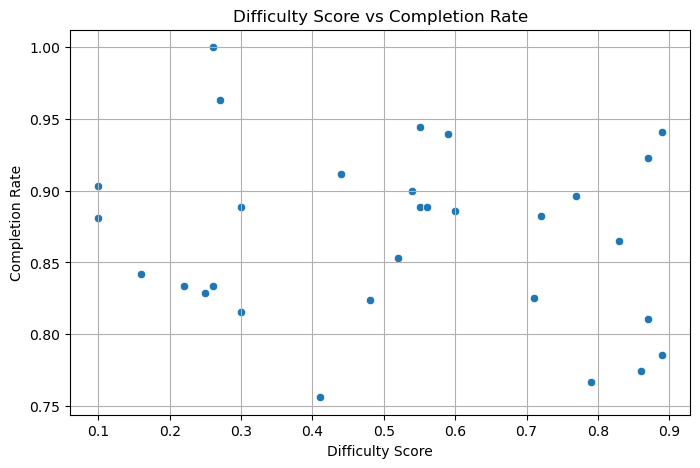

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x="difficulty_score", y="completion_rate")
plt.title("Difficulty Score vs Completion Rate")
plt.xlabel("Difficulty Score")
plt.ylabel("Completion Rate")
plt.grid(True)
plt.show()


### Determination of Drop-off Levels

In [13]:
median_completion = merged["completion_rate"].median()
print(f"Medyan completion_rate: {median_completion:.2f}")


Medyan completion_rate: 0.88


In [15]:
# if completion_rate < 0.88 = drop-off
dropoff_levels = merged[merged["completion_rate"] < median_completion].sort_values("completion_rate")

In [16]:
dropoff_levels_display = dropoff_levels[[
    "level_id", "target_word", "difficulty", "difficulty_score", "completion_rate", "avg_completion_time"
]]

print(dropoff_levels_display)

    level_id target_word difficulty  difficulty_score  completion_rate  \
11        11      STREAM     Medium              0.41         0.756098   
21        21      WIZARD       Hard              0.79         0.766667   
29        29     EQUATOR       Hard              0.86         0.774194   
27        27     MYSTERY       Hard              0.89         0.785714   
28        28    GULLIVER       Hard              0.87         0.810811   
1          1         SUN       Easy              0.30         0.815789   
17        17      WINDOW     Medium              0.48         0.823529   
25        25      ZEPHYR       Hard              0.71         0.825000   
6          6        BOOK       Easy              0.25         0.828571   
8          8        ROAD       Easy              0.26         0.833333   
9          9        WIND       Easy              0.22         0.833333   
3          3         DOG       Easy              0.16         0.842105   
13        13      PYTHON     Medium   

### Tuning Suggestions

In [21]:
def suggest_tuning(row):
    if row["completion_rate"] < median_completion and row["difficulty_score"] > 0.6:
        return "Make Easier"
    elif row["completion_rate"] > 0.9 and row["difficulty_score"] < 0.3:
        return "Make Harder"
    else:
        return "OK"

merged["tuning_suggestion"] = merged.apply(suggest_tuning, axis=1)

# Drop-off seviyelerine göre filtreleyip inceleyelim
dropoff_tuning = merged[merged["completion_rate"] < median_completion][[
    "level_id", "target_word", "difficulty_score", "completion_rate", "tuning_suggestion"
]]

print(dropoff_tuning.sort_values("completion_rate"))


    level_id target_word  difficulty_score  completion_rate tuning_suggestion
11        11      STREAM              0.41         0.756098                OK
21        21      WIZARD              0.79         0.766667       Make Easier
29        29     EQUATOR              0.86         0.774194       Make Easier
27        27     MYSTERY              0.89         0.785714       Make Easier
28        28    GULLIVER              0.87         0.810811       Make Easier
1          1         SUN              0.30         0.815789                OK
17        17      WINDOW              0.48         0.823529                OK
25        25      ZEPHYR              0.71         0.825000       Make Easier
6          6        BOOK              0.25         0.828571                OK
8          8        ROAD              0.26         0.833333                OK
9          9        WIND              0.22         0.833333                OK
3          3         DOG              0.16         0.842105     